
 ****** Running generation 0 ****** 

Population's average fitness: 2.24924 stdev: 0.36318
Best fitness: 2.99738 - size: (1, 2) - species 1 - id 150
Average adjusted fitness: 0.603
Mean genetic distance 1.051, standard deviation 0.389
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.603     0
Total extinctions: 0
Generation time: 0.010 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.34768 stdev: 0.34246
Best fitness: 2.99831 - size: (1, 2) - species 1 - id 276
Average adjusted fitness: 0.615
Mean genetic distance 1.251, standard deviation 0.481
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.615     0
Total extinctions: 0
Generation time: 0.011 sec (0.010 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.32364 stdev: 

Mean genetic distance 2.127, standard deviation 0.750
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   28    14      3.4    0.605    17
     2   12    99      3.3    0.544     9
     3    6    37      3.0    0.546     1
Total extinctions: 0
Generation time: 0.036 sec (0.016 average)

 ****** Running generation 29 ****** 

Population's average fitness: 2.40883 stdev: 0.45387
Best fitness: 3.44919 - size: (2, 4) - species 2 - id 1668
Average adjusted fitness: 0.568
Mean genetic distance 2.149, standard deviation 0.851
Population of 149 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   29    35      3.1    0.529    18
     2   13    81      3.4    0.565    10
     3    7    33      3.0    0.609     2
Total extinctions: 0
Generation time: 0.013 sec (0.016 average)
Saving checkpoint to neat-checkpoint-29

 ****** Running generation 30 ****** 




 ****** Running generation 45 ****** 

Population's average fitness: 2.34353 stdev: 0.48269
Best fitness: 3.85207 - size: (3, 7) - species 2 - id 6558
Average adjusted fitness: 0.364
Mean genetic distance 2.246, standard deviation 0.776
Population of 151 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   29    47      3.9    0.431     1
     3   23    78      3.4    0.341     0
     4    6    12      3.0    0.431     0
     5    3    14      2.0    0.253     1
Total extinctions: 0
Generation time: 0.018 sec (0.015 average)

 ****** Running generation 46 ****** 

Population's average fitness: 2.31426 stdev: 0.49288
Best fitness: 3.85207 - size: (3, 7) - species 2 - id 6558
Average adjusted fitness: 0.376
Mean genetic distance 2.080, standard deviation 0.822
Population of 151 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   30    41      3.9    0.447     2
  

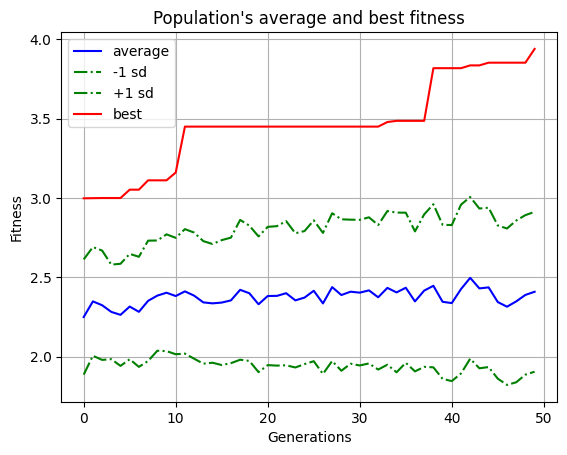

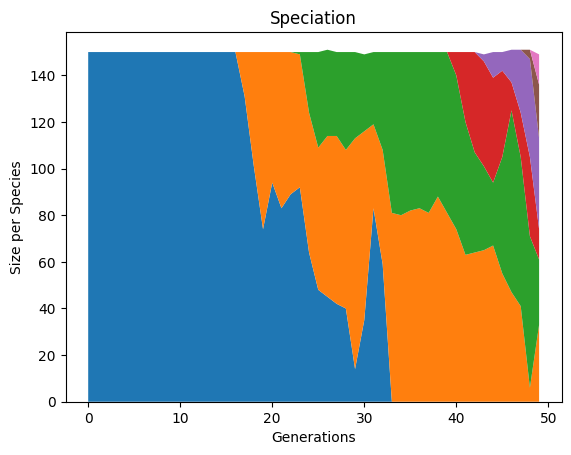

Mean genetic distance 1.544, standard deviation 0.629
Mean genetic distance 1.357, standard deviation 0.600
Mean genetic distance 1.239, standard deviation 0.489
Mean genetic distance 1.293, standard deviation 0.446
Mean genetic distance 1.307, standard deviation 0.436
Mean genetic distance 1.393, standard deviation 0.479
Mean genetic distance 1.388, standard deviation 0.475
Mean genetic distance 1.418, standard deviation 0.444
Mean genetic distance 1.558, standard deviation 0.494
Mean genetic distance 1.562, standard deviation 0.531


In [2]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

from __future__ import print_function
import os
import neat
import visualize

# 2-input XOR inputs and expected outputs.
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


def run(config_file):
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 300)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    visualize.draw_net(config, winner, True, node_names=node_names)
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
    p.run(eval_genomes, 10)


if __name__ == '__main__':
    # Determine path to configuration file. This path manipulation is
    # here so that the script will run successfully regardless of the
    # current working directory.
    local_dir = os.path.abspath('')
    config_path = os.path.join(local_dir, 'config-feedforward')
    run(config_path)

In [ ]:
""" 2-input XOR example using Izhikevich's spiking neuron model. """
from __future__ import print_function

import multiprocessing
import os

from matplotlib import patches
from matplotlib import pylab as plt

import visualize

import neat

# Network inputs and expected outputs.
xor_inputs = ((0, 0), (0, 1), (1, 0), (1, 1))
xor_outputs = (0, 1, 1, 0)

# Maximum amount of simulated time (in milliseconds) to wait for the network to produce an output.
max_time_msec = 20.0


def compute_output(t0, t1):
    """Compute the network's output based on the "time to first spike" of the two output neurons."""
    if t0 is None or t1 is None:
        # If neither of the output neurons fired within the allotted time,
        # give a response which produces a large error.
        return -1.0
    else:
        # If the output neurons fire within 1.0 milliseconds of each other,
        # the output is 1, and if they fire more than 11 milliseconds apart,
        # the output is 0, with linear interpolation between 1 and 11 milliseconds.
        response = 1.1 - 0.1 * abs(t0 - t1)
        return max(0.0, min(1.0, response))


def simulate(genome, config):
    # Create a network of "fast spiking" Izhikevich neurons.
    net = neat.iznn.IZNN.create(genome, config)
    dt = net.get_time_step_msec()
    sum_square_error = 0.0
    simulated = []
    for idata, odata in zip(xor_inputs, xor_outputs):
        neuron_data = {}
        for i, n in net.neurons.items():
            neuron_data[i] = []

        # Reset the network, apply the XOR inputs, and run for the maximum allowed time.
        net.reset()
        net.set_inputs(idata)
        t0 = None
        t1 = None
        v0 = None
        v1 = None
        num_steps = int(max_time_msec / dt)
        net.set_inputs(idata)
        for j in range(num_steps):
            t = dt * j
            output = net.advance(dt)

            # Capture the time and neuron membrane potential for later use if desired.
            for i, n in net.neurons.items():
                neuron_data[i].append((t, n.current, n.v, n.u, n.fired))

            # Remember time and value of the first output spikes from each neuron.
            if t0 is None and output[0] > 0:
                t0, I0, v0, u0, f0 = neuron_data[net.outputs[0]][-2]

            if t1 is None and output[1] > 0:
                t1, I1, v1, u1, f0 = neuron_data[net.outputs[1]][-2]

        response = compute_output(t0, t1)
        sum_square_error += (response - odata) ** 2

        #print(genome)
        #visualize.plot_spikes(neuron_data[net.outputs[0]], False)
        #visualize.plot_spikes(neuron_data[net.outputs[1]], True)

        simulated.append((idata, odata, t0, t1, v0, v1, neuron_data))

    return sum_square_error, simulated


def eval_genome(genome, config):
    sum_square_error, simulated = simulate(genome, config)
    return 10.0 - sum_square_error


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = eval_genome(genome, config)


def run(config_path):
    # Load the config file, which is assumed to live in
    # the same directory as this script.
    config = neat.Config(neat.iznn.IZGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_path)

    # For this network, we use two output neurons and use the difference between
    # the "time to first spike" to determine the network response.  There are
    # probably a great many different choices one could make for an output encoding,
    # and this choice may not be the best for tackling a real problem.
    config.output_nodes = 2

    pop = neat.population.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    pop.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    pop.add_reporter(stats)

    pe = neat.ParallelEvaluator(multiprocessing.cpu_count(), eval_genome)
    winner = pop.run(pe.evaluate, 3000)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    node_names = {-1:'A', -2: 'B'}
    visualize.draw_net(config, winner, True, node_names=node_names)
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

    # Show output of the most fit genome against training data, and create
    # a plot of the traces out to the max time for each set of inputs.
    print('\nBest network output:')
    plt.figure(figsize=(12, 12))
    sum_square_error, simulated = simulate(winner, config)
    for r, (inputData, outputData, t0, t1, v0, v1, neuron_data) in enumerate(simulated):
        response = compute_output(t0, t1)
        print("{0!r} expected {1:.3f} got {2:.3f}".format(inputData, outputData, response))

        axes = plt.subplot(4, 1, r + 1)
        plt.title("Traces for XOR input {{{0:.1f}, {1:.1f}}}".format(*inputData), fontsize=12)
        for i, s in neuron_data.items():
            if i in [0, 1]:
                t, I, v, u, fired = zip(*s)
                plt.plot(t, v, "-", label="neuron {0:d}".format(i))

        # Circle the first peak of each output.
        circle0 = patches.Ellipse((t0, v0), 1.0, 10.0, color='r', fill=False)
        circle1 = patches.Ellipse((t1, v1), 1.0, 10.0, color='r', fill=False)
        axes.add_artist(circle0)
        axes.add_artist(circle1)

        plt.ylabel("Potential (mv)", fontsize=10)
        plt.ylim(-100, 50)
        plt.tick_params(labelsize=8)
        plt.grid()

    plt.xlabel("Time (in ms)", fontsize=10)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.savefig("traces.png", dpi=90)
    plt.show()


if __name__ == '__main__':
    local_dir = os.path.abspath('')
    run(os.path.join(local_dir, 'config-spiking'))



 ****** Running generation 0 ****** 

